In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score, pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from scipy import stats

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.K = n_neighbors
        self.algorithm = algorithm.lower()
        self.metric = metric
        pass
    
    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.X = X
            self.y = y
        elif self.algorithm == 'kd_tree':
            self.y = y
            self.tree = KDTree(X)

    def predict(self, X):
        if self.algorithm == 'brute':
            dists = pairwise_distances(X, self.X, self.metric)
            indices = np.argpartition(dists, self.K, axis=1)[:, :self.K]
        else:
            indices = self.tree.query(X, self.K, return_distance=False)
        classes = self.y[indices]
        return stats.mode(classes, axis=1).mode.ravel()
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 687 µs, sys: 428 µs, total: 1.11 ms
Wall time: 762 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 11.7 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 3.59 ms, total: 3.59 ms
Wall time: 2.57 ms


array([1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 1.16 ms, sys: 5.19 ms, total: 6.35 ms
Wall time: 3.49 ms


array([1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 757 µs, sys: 479 µs, total: 1.24 ms
Wall time: 898 µs


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 214 µs, sys: 135 µs, total: 349 µs
Wall time: 301 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 5.24 ms, sys: 493 µs, total: 5.74 ms
Wall time: 3.48 ms


array([2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 1.21 ms, sys: 763 µs, total: 1.98 ms
Wall time: 1.31 ms


array([2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
v_zer = CountVectorizer(max_features=10000)
X = v_zer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
from sklearn.model_selection import KFold

In [23]:
kf = KFold(n_splits=3, shuffle=True)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
def optimal_k(X, y, kf, K, metric='euclidean'):
    scores = []
    for k in K:
        cur_score = []
        for train, test in kf.split(X):
            Cl = MyKNeighborsClassifier(k, metric=metric)
            Cl.fit(X[train], y[train])
            cur_score.append(accuracy_score(Cl.predict(X[test]), y[test]))
        scores.append(np.mean(cur_score))
    return scores

In [25]:
%%time

scores = optimal_k(X, target, kf, np.arange(1, 11))

CPU times: user 46.9 s, sys: 4.51 s, total: 51.4 s
Wall time: 51.4 s


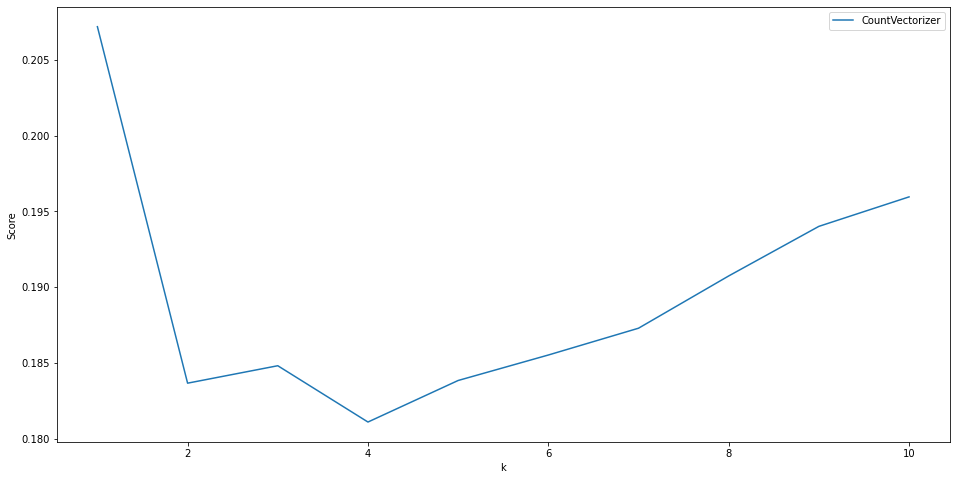

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set(xlabel='k', ylabel='Score');
sns.lineplot(ax = ax, x=np.arange(1,11), y=scores, label='CountVectorizer');

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [27]:
cos_scores = optimal_k(X, target, kf, np.arange(1,11), metric='cosine')

In [28]:
tlidf_v_zer = TfidfVectorizer(max_features=10000)
X_tlidf = tlidf_v_zer.fit_transform(data)

In [29]:
scores_tlidf = optimal_k(X_tlidf, target, kf, np.arange(1,11))

In [30]:
cos_scores_tlidf = optimal_k(X_tlidf, target, kf, np.arange(1,11), metric='cosine')

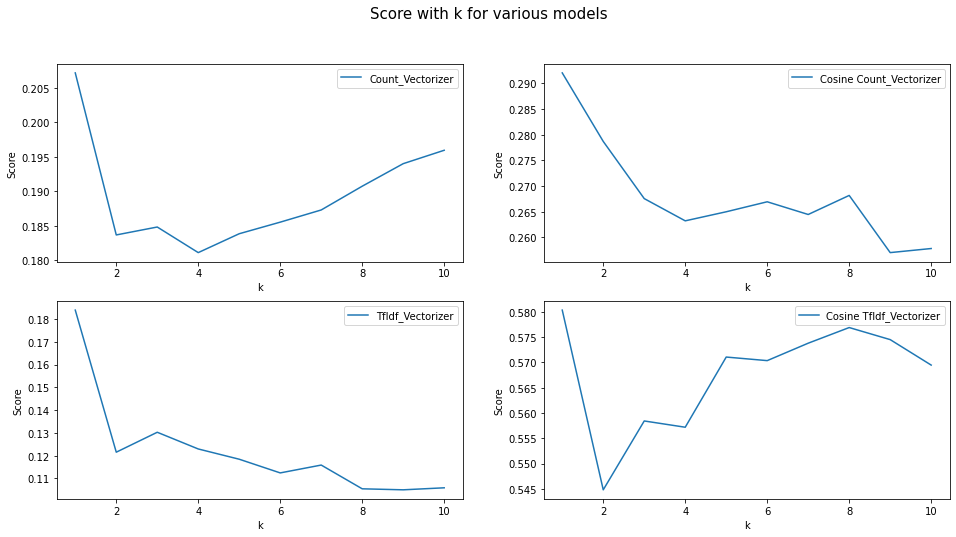

In [31]:
models = {'Count_Vectorizer': scores,
          'Cosine Count_Vectorizer': cos_scores,
          'TfIdf_Vectorizer': scores_tlidf,
          'Cosine TfIdf_Vectorizer': cos_scores_tlidf}
fig, axes = plt.subplots(2, 2, figsize=(16,8))
fig.suptitle("Score with k for various models", fontsize=15)
for ax, label in zip(axes.flatten(), models):
    ax.set(xlabel='k', ylabel='Score');
    sns.lineplot(ax = ax, x=np.arange(1,11), y=models[label], label=label)


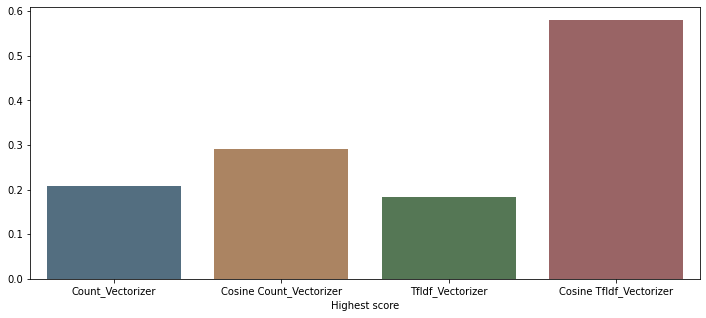

In [32]:
max_scores = [max(models[name]) for name in models]
fig, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel='Highest score')
sns.barplot(x=list(models.keys()), y=max_scores, saturation=0.3, orient='v');

**Вывод:**

Лучшей моделью оказаласть TlIdf векторизация и косинусовая метрика.

In [33]:
best_metric = 'cosine'

Теперь поищем оптимальное количество соседей.

In [34]:
%%time
more_scores = optimal_k(X_tlidf, target, kf, np.arange(1,31), metric='cosine')

CPU times: user 2min 32s, sys: 14.1 s, total: 2min 46s
Wall time: 2min 46s


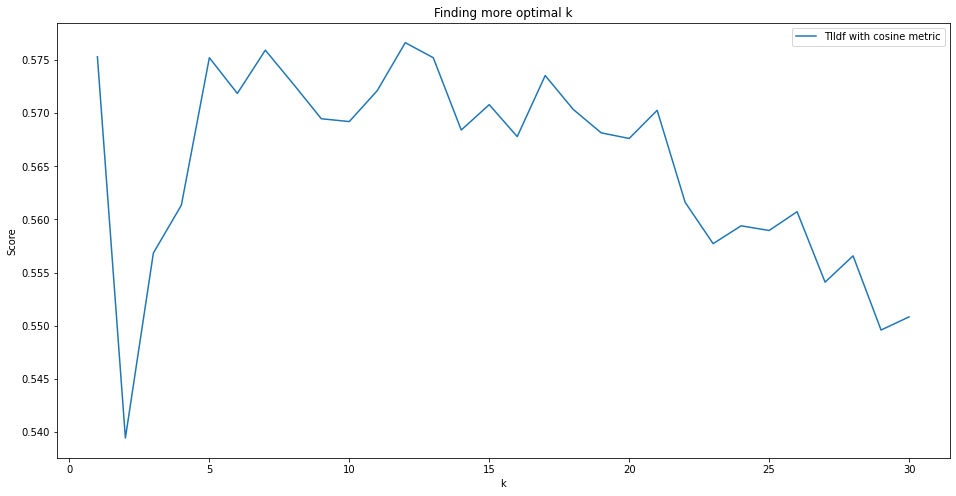

In [35]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set(xlabel='k', ylabel='Score');
ax.set_title('Finding more optimal k')
sns.lineplot(ax = ax, x=np.arange(1,31), y=more_scores, label='TlIdf with cosine metric');

**Вывод:**
Оптимальное число соседей ~15

In [36]:
best_k = 15

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

Используем мой классификатор:

In [37]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
test_data = newsgroups['data']
test_target = newsgroups['target']

v_zer = TfidfVectorizer(max_features=10000)
X_test = v_zer.fit_transform(test_data)

In [38]:
MyCl = MyKNeighborsClassifier(best_k, metric=best_metric)
MyCl.fit(X_tlidf, target)

In [39]:
%%time
pred = MyCl.predict(X_test)

CPU times: user 1.91 s, sys: 1.06 s, total: 2.97 s
Wall time: 3.23 s


Используем классификатор из коробки:

In [40]:
Cl = KNeighborsClassifier(best_k, metric=best_metric)
Cl.fit(X_tlidf, target);

In [41]:
%%time
orig_pred = Cl.predict(X_test)

CPU times: user 1.95 s, sys: 678 ms, total: 2.63 s
Wall time: 2.64 s


Разница в результате между моим классификатором и классификатором из коробки:

In [42]:
accuracy_score(test_target, pred) - accuracy_score(test_target, orig_pred)

0.0

**Вывод:** Разница между кросс-валидацией и тестовой выборкой основана на том, что тренировочная выборка плохо справилась с тестовой. Наверняка это связано с изначальным количеством слов в словаре. Проверю в следующий раз :)